In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm  
import numpy as np
from scipy.stats import lognorm
import numpy.random as ra
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

np.set_printoptions(threshold=np.nan)


In [3]:
gas_prices = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/fuel/fuel_wholesale_price/natural_gas_historical_price/EIA-STEO_NGSPUUK_M (1).csv')
gas_prices.head()

,Date,Value
0,2017-12-31,7.618882
1,2017-11-30,7.897095
2,2017-10-31,7.138350
3,2017-09-30,6.770626
4,2017-08-31,6.334714


In [4]:
gas_prices['Date'] = pd.to_datetime(gas_prices['Date'])
gas_prices.head()

,Date,Value
0,2017-12-31,7.618882
1,2017-11-30,7.897095
2,2017-10-31,7.138350
3,2017-09-30,6.770626
4,2017-08-31,6.334714


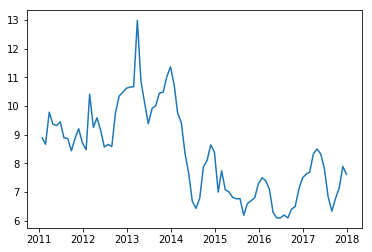

In [5]:
plt.plot(gas_prices.Date, gas_prices.Value)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e7d3c18>]],
      dtype=object)

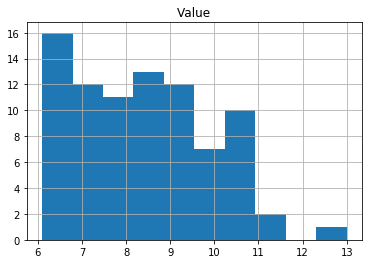

In [6]:
gas_prices.hist()

Standard deviation for each year

In [7]:
gas_prices_group = gas_prices.groupby(gas_prices.Date.dt.year)
gas_prices_group.std()

,Value
Date,
2011,0.386908
2012,0.824890
2013,0.909880
2014,1.292635
2015,0.382562
2016,0.580687
2017,0.681188


In [8]:
gas_prices_group.std()

,Value
Date,
2011,0.386908
2012,0.824890
2013,0.909880
2014,1.292635
2015,0.382562
2016,0.580687
2017,0.681188


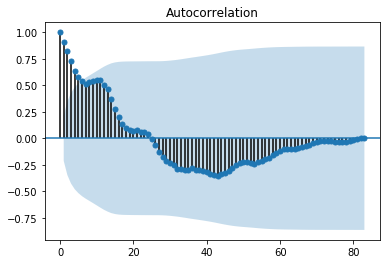

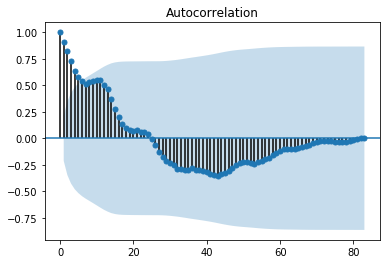

In [9]:
plot_acf(gas_prices['Value'])

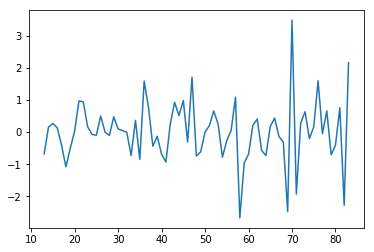

In [10]:
gas_prices['diff_1'] = gas_prices.Value.diff().diff(periods=12)
gas_prices
plt.plot(gas_prices['diff_1'])
gas_prices = gas_prices.dropna()

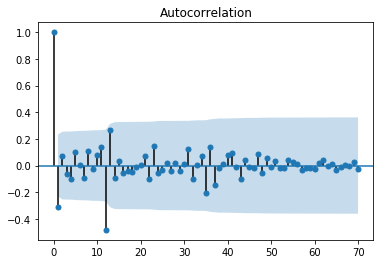

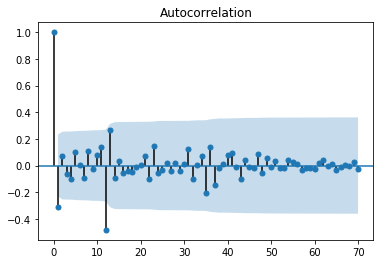

In [11]:
plot_acf(gas_prices['diff_1'])

/Users/b1017579/.local/share/virtualenvs/12._Reinforcement_Learning-DLBnGMow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


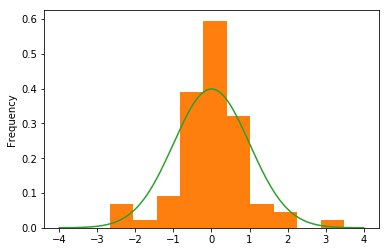

In [12]:
gas_prices.diff_1.plot(kind='hist', normed=True)
gas_prices.diff_1.plot(kind='hist', density=True)
range = np.arange(-4, 4, 0.001)
plt.plot(range, norm.pdf(range,0,1))


In [13]:
count, division = np.histogram(gas_prices.diff_1, bins=20)
count, division


(array([ 2,  1,  1,  0,  0,  4, 10,  7, 13, 13,  8,  6,  1,  2,  1,  1,  0,
         0,  0,  1]),
 array([-2.67136237, -2.36374281, -2.05612326, -1.7485037 , -1.44088415,
        -1.13326459, -0.82564504, -0.51802548, -0.21040593,  0.09721363,
         0.40483318,  0.71245274,  1.0200723 ,  1.32769185,  1.63531141,
         1.94293096,  2.25055052,  2.55817007,  2.86578963,  3.17340918,
         3.48102874]))

In [14]:
count/sum(count)

array([0.02816901, 0.01408451, 0.01408451, 0.        , 0.        ,
       0.05633803, 0.14084507, 0.09859155, 0.18309859, 0.18309859,
       0.11267606, 0.08450704, 0.01408451, 0.02816901, 0.01408451,
       0.01408451, 0.        , 0.        , 0.        , 0.01408451])

In [15]:
prob = count/sum(count)
cum_prob = np.cumsum(prob)
cum_prob

array([0.02816901, 0.04225352, 0.05633803, 0.05633803, 0.05633803,
       0.11267606, 0.25352113, 0.35211268, 0.53521127, 0.71830986,
       0.83098592, 0.91549296, 0.92957746, 0.95774648, 0.97183099,
       0.98591549, 0.98591549, 0.98591549, 0.98591549, 1.        ])

<BarContainer object of 20 artists>

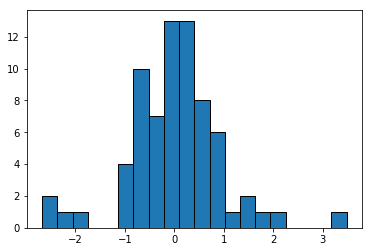

In [16]:
fig, ax = plt.subplots()
ax.bar(division[:-1], count, width=np.diff(division), ec="k", align="edge")

<BarContainer object of 20 artists>

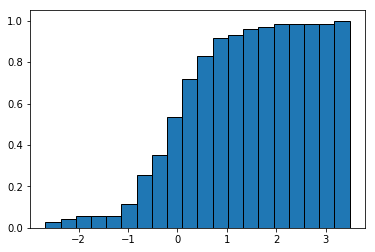

In [17]:
fig, ax = plt.subplots()
ax.bar(division[:-1], cum_prob, width=np.diff(division), ec="k", align="edge")


In [18]:
N = 10000
R = ra.uniform(0, 1, N)
count_array = division
cum_prob_array = cum_prob
count_array
gen_points = [count_array[np.argwhere(cum_prob_array == min(cum_prob_array[(cum_prob_array - r) > 0]))][0][0] for r in R]
generated_points = pd.Series(gen_points)
[[x,gen_points.count(x)] for x in set(gen_points)]


[[0.7124527401650003, 801],
 [-0.5180254806949995, 1003],
 [0.09721362973500058, 1798],
 [-0.21040592547999948, 1888],
 [-0.8256450359099992, 1415],
 [0.4048331849500002, 1125],
 [1.327691850595, 261],
 [1.0200722953800003, 121],
 [1.9429309610249996, 134],
 [1.6353114058099996, 144],
 [3.173409181884999, 155],
 [-2.056123256769999, 142],
 [-2.3637428119849986, 147],
 [-2.6713623671999986, 306],
 [-1.1332645911249992, 560]]

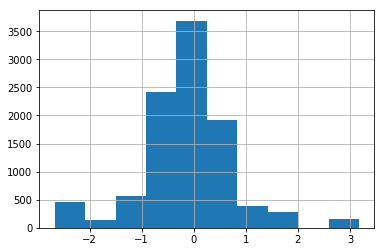

In [19]:
generated_points = pd.Series(gen_points)
generated_points.hist()

In [20]:
gas_prices['diff_1'].std()

0.9678526811662029

# ARIMA Model

/Users/b1017579/.local/share/virtualenvs/12._Reinforcement_Learning-DLBnGMow/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


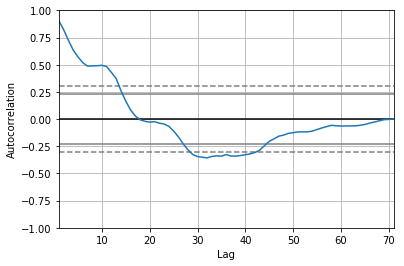

In [21]:
autocorrelation_plot(gas_prices['Value'])

In [22]:
model = ARIMA(gas_prices['Value'], order=(12,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/b1017579/.local/share/virtualenvs/12._Reinforcement_Learning-DLBnGMow/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/b1017579/.local/share/virtualenvs/12._Reinforcement_Learning-DLBnGMow/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                   70
Model:                ARIMA(12, 1, 0)   Log Likelihood                 -67.357
Method:                       css-mle   S.D. of innovations              0.629
Date:                Sun, 13 Jan 2019   AIC                            162.713
Time:                        15:59:44   BIC                            194.192
Sample:                             1   HQIC                           175.217
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0340      0.046      0.738      0.464      -0.056       0.124
ar.L1.D.Value     -0.1728      0.119     -1.450      0.152      -0.406       0.061
ar.L2.D.Value      0.0061      0.121

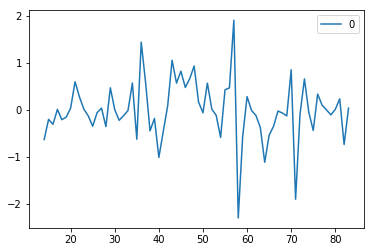

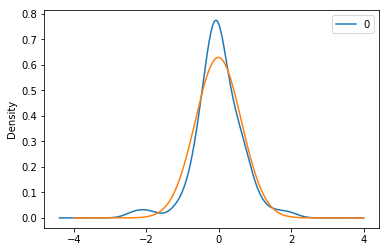

               0
count  70.000000
mean   -0.010028
std     0.634514
min    -2.300330
25%    -0.289265
50%    -0.023480
75%     0.318994
max     1.901745


,0
14,-0.633992
15,-0.205624
16,-0.310264
17,0.007020
18,-0.212001
19,-0.156953
20,0.034194
21,0.593624
22,0.271643
23,0.011844


In [23]:
x_axis = np.arange(-4, 4, 0.001)

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.plot(x_axis, norm.pdf(x_axis,-0.010028,0.634514))
plt.show()
print(residuals.describe())
residuals

/Users/b1017579/.local/share/virtualenvs/12._Reinforcement_Learning-DLBnGMow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/b1017579/.local/share/virtualenvs/12._Reinforcement_Learning-DLBnGMow/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Frequency')

<Figure size 864x576 with 0 Axes>

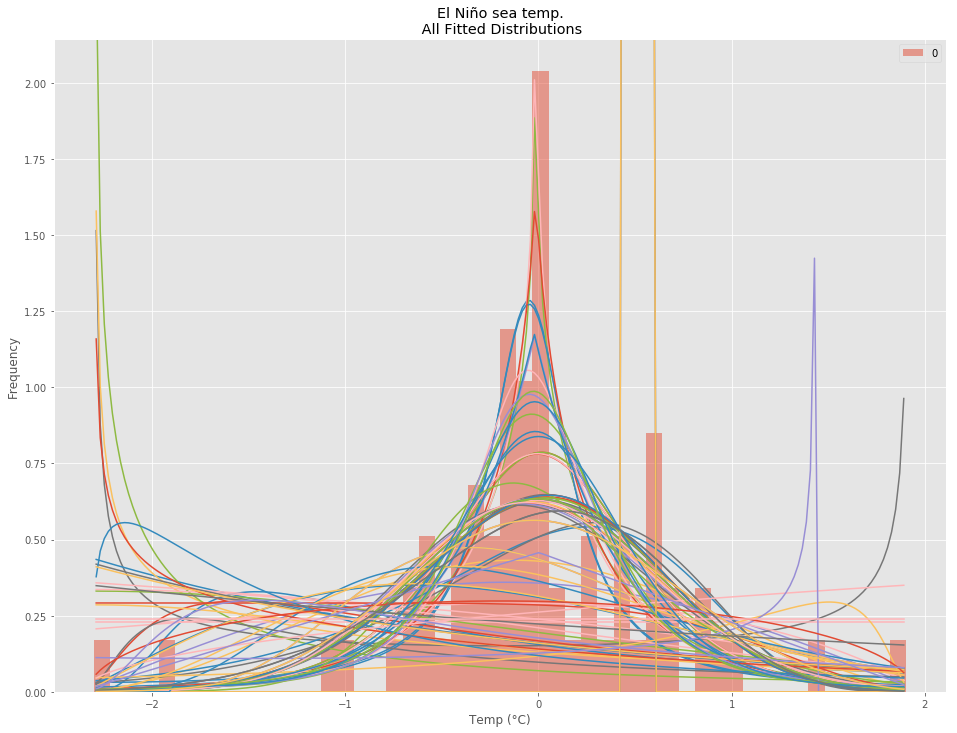

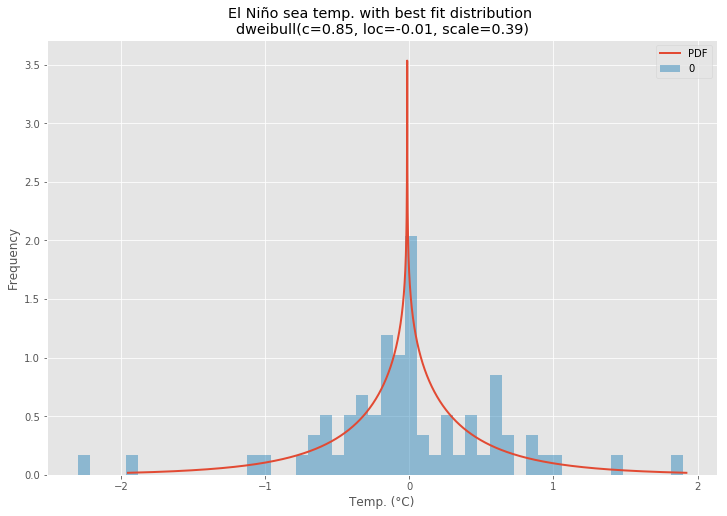

In [24]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = residuals

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

# Coal Price Analysis

In [30]:
coal_price = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/fuel/fuel_wholesale_price/coal_historical_price/Coal Futures Historical Data.csv')
coal_price = coal_price[['Date', 'Price']]
coal_price.head()

,Date,Price
0,Dec 18,75.15
1,Nov 18,73.55
2,Oct 18,78.05
3,Sep 18,75.55
4,Aug 18,69.97


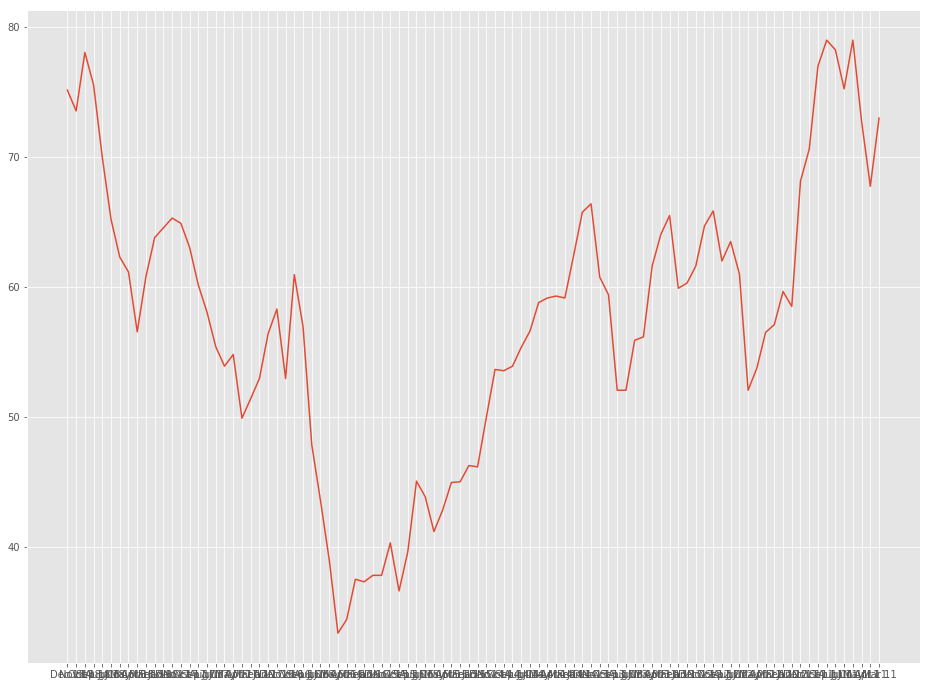

In [31]:
plt.plot(coal_price.Date, coal_price.Price)
plt.show()

/Users/b1017579/.local/share/virtualenvs/12._Reinforcement_Learning-DLBnGMow/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


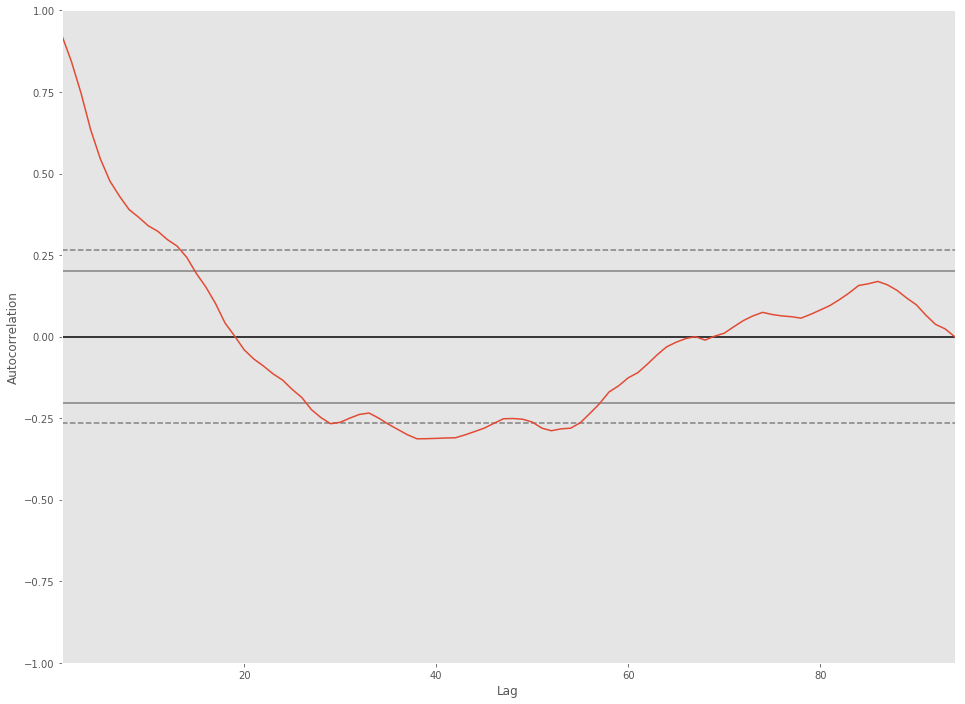

In [32]:
autocorrelation_plot(coal_price.Price)

In [33]:
model = ARIMA(coal_price.Price, order=(12,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                   93
Model:                ARIMA(12, 1, 0)   Log Likelihood                -245.255
Method:                       css-mle   S.D. of innovations              3.370
Date:                Sun, 13 Jan 2019   AIC                            518.511
Time:                        16:03:42   BIC                            553.967
Sample:                             1   HQIC                           532.827
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0154      0.297      0.052      0.959      -0.566       0.597
ar.L1.D.Price      0.1095      0.104      1.051      0.296      -0.095       0.314
ar.L2.D.Price      0.0053      0.106

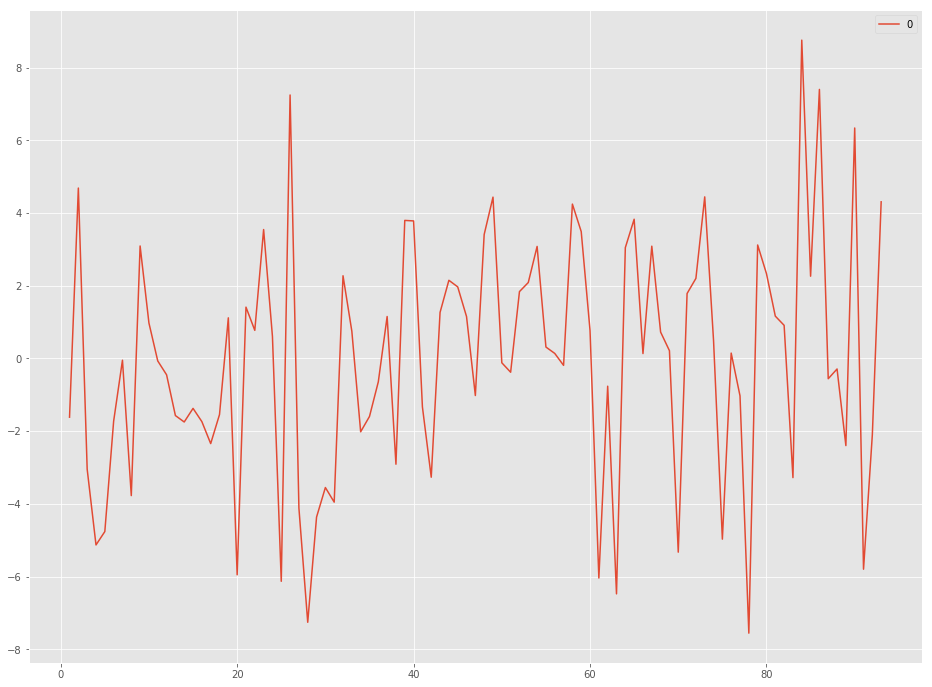

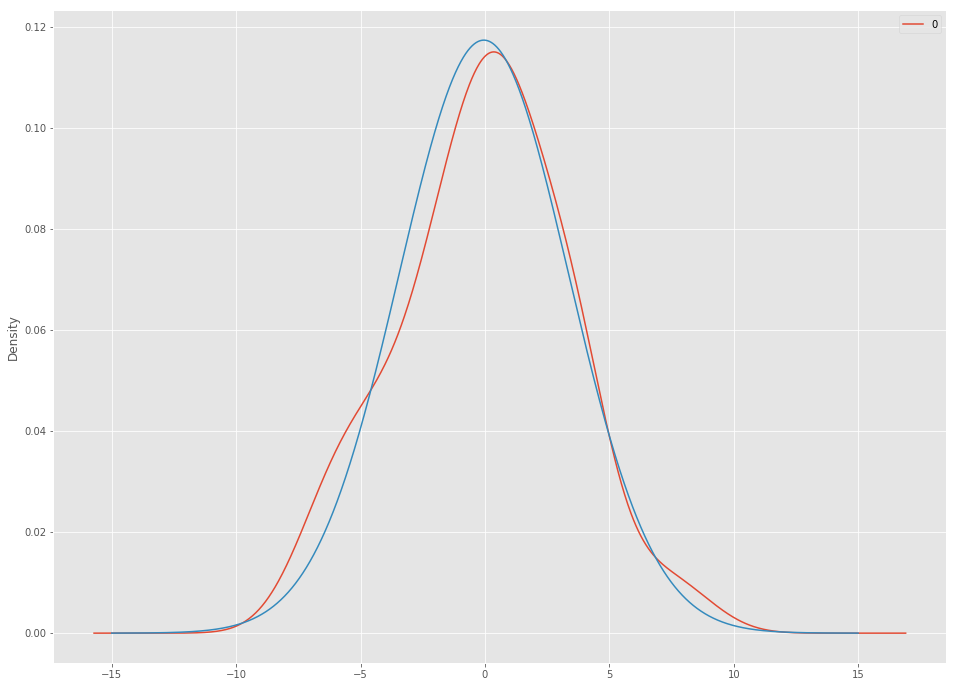

               0
count  93.000000
mean   -0.042884
std     3.400331
min    -7.555142
25%    -2.016504
50%     0.138955
75%     2.202642
max     8.755897


In [34]:
x_axis = np.arange(-15, 15, 0.001)

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.plot(x_axis, norm.pdf(x_axis,-0.042884,3.400331))
plt.show()
print(residuals.describe())
